In [25]:
#importing the nessary paccages
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [27]:
df=pd.read_csv('/content/seattle-weather.csv')

In [28]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [30]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [31]:
#Extract day, month, and year from 'date' column
df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['year']=pd.to_datetime(df['date']).dt.year

In [32]:
df.drop(columns=['date'],inplace=True)

In [33]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [34]:
#Map weather categories to numerical values
df['weather']=df['weather'].map({'rain':0,'sun':1,'fog':2,'drizzle':3,'snow':4})

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5
weather,1461.0,0.756331,0.868495,0.0,0.0,1.0,1.0,4.0
day,1461.0,15.729637,8.803105,1.0,8.0,16.0,23.0,31.0
month,1461.0,6.522930,3.449884,1.0,4.0,7.0,10.0,12.0
year,1461.0,2013.498973,1.118723,2012.0,2012.0,2013.0,2014.0,2015.0


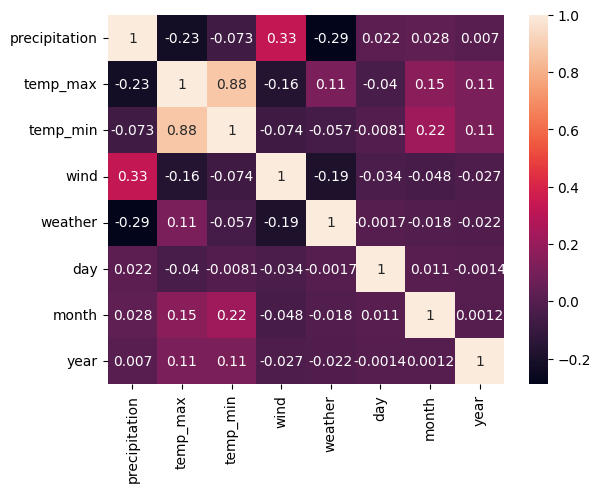

In [36]:
#Heatmap
corr=sns.heatmap(df.corr(),annot=True)

In [37]:
#Checking Count occurrences of each weather category
df['weather'].value_counts()

,count
weather,
0,641
1,640
2,101
3,53
4,26


In [38]:
#Balance the dataset using SMOTE-Tomek
from imblearn.combine import SMOTETomek

In [39]:
x=df.drop(columns=['weather'])
y=df['weather']

X_new,Y_new=SMOTETomek().fit_resample(x,y)

In [40]:
X_new.shape

(3077, 7)

In [41]:
Y_new.shape

(3077,)

In [42]:
df.shape

(1461, 8)

In [43]:
#Concadinating the dataFrame
df_samp=pd.concat([X_new,Y_new],axis=1)

In [44]:
df_samp

,precipitation,temp_max,temp_min,wind,day,month,year,weather
0,0.000000,12.800000,5.000000,4.700000,1,1,2012,3
1,10.900000,10.600000,2.800000,4.500000,2,1,2012,0
2,0.800000,11.700000,7.200000,2.300000,3,1,2012,0
3,20.300000,12.200000,5.600000,4.700000,4,1,2012,0
4,1.300000,8.900000,2.800000,6.100000,5,1,2012,0
...,...,...,...,...,...,...,...,...
3072,8.742931,7.225834,1.475246,3.898920,21,12,2012,4
3073,4.517668,4.841310,0.600000,5.181792,14,1,2012,4
3074,9.400000,8.087181,0.600000,4.452097,15,3,2012,4
3075,4.642524,9.076816,2.519340,2.038136,5,3,2012,4


In [45]:
#Visualizing the data
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


In [46]:
columns=['precipitation', 'temp_max', 'temp_min', 'wind', 'day', 'month', 'year']

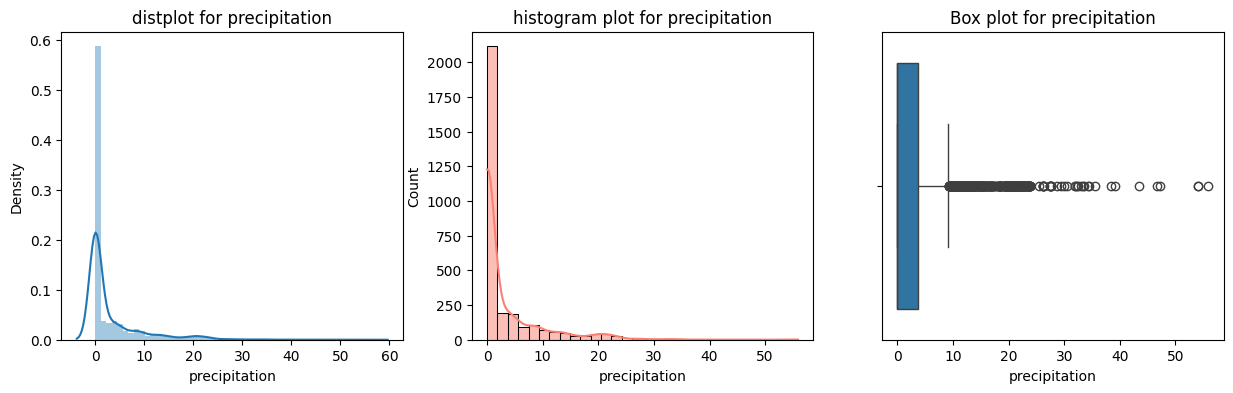

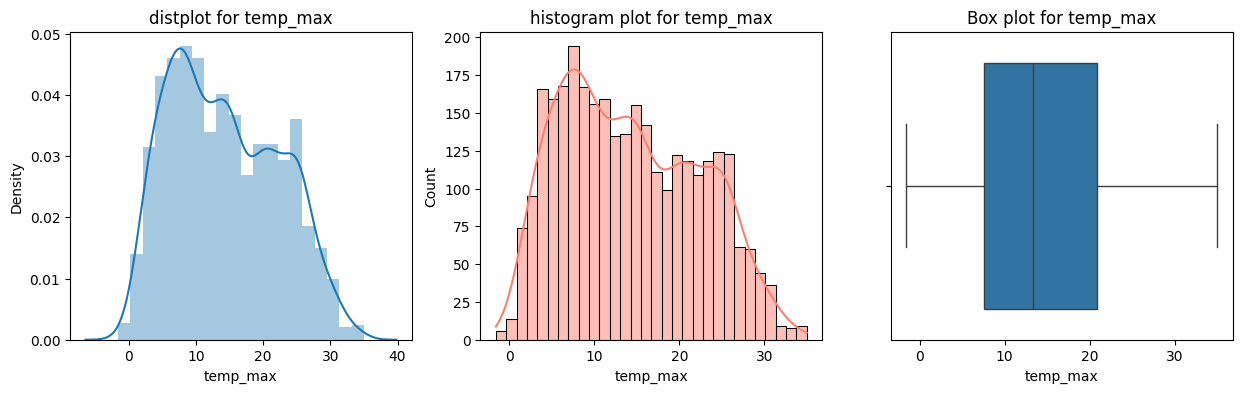

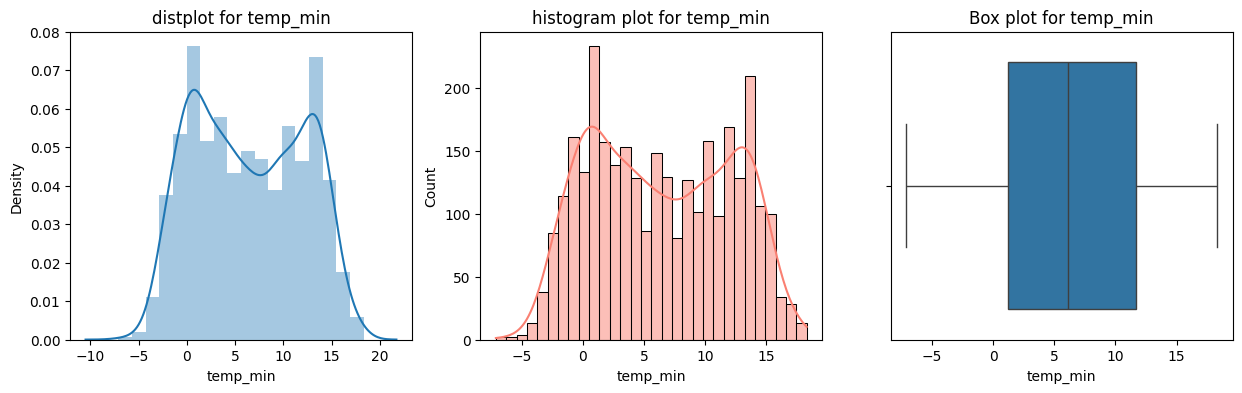

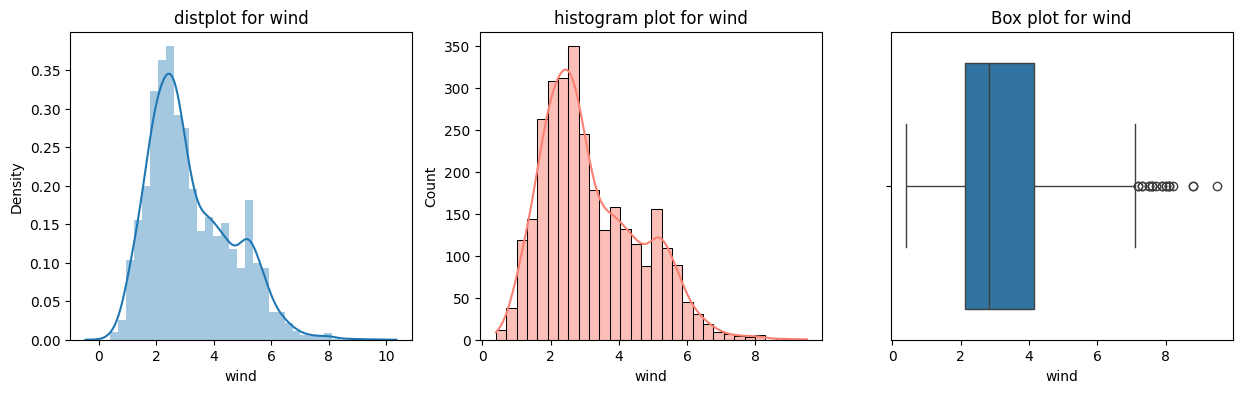

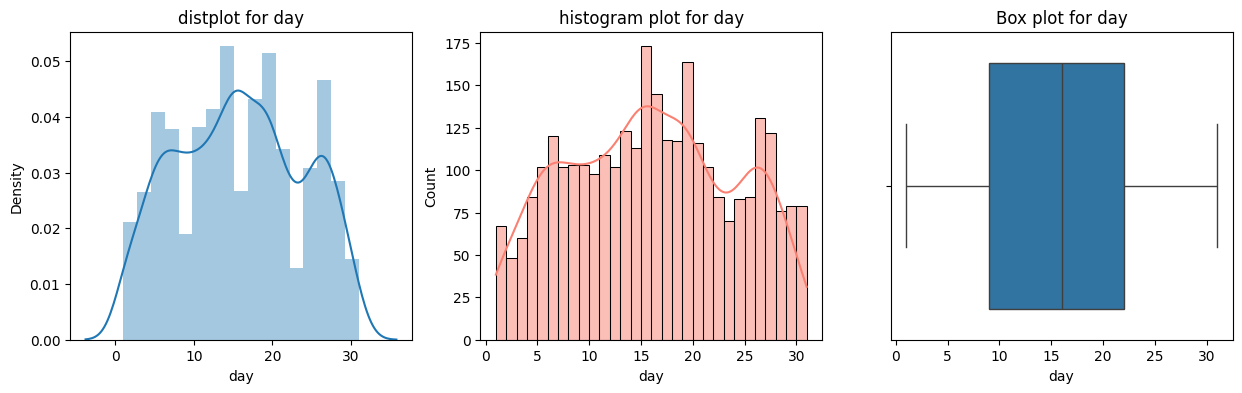

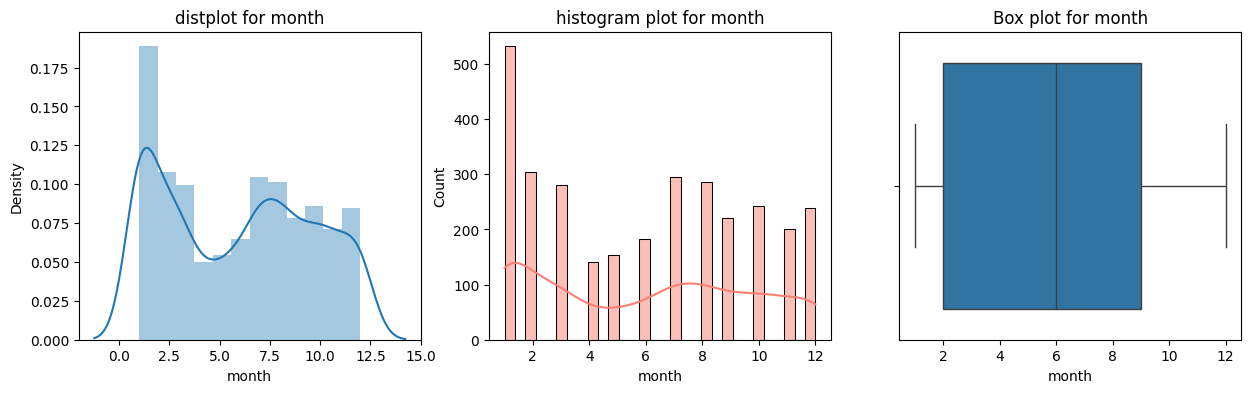

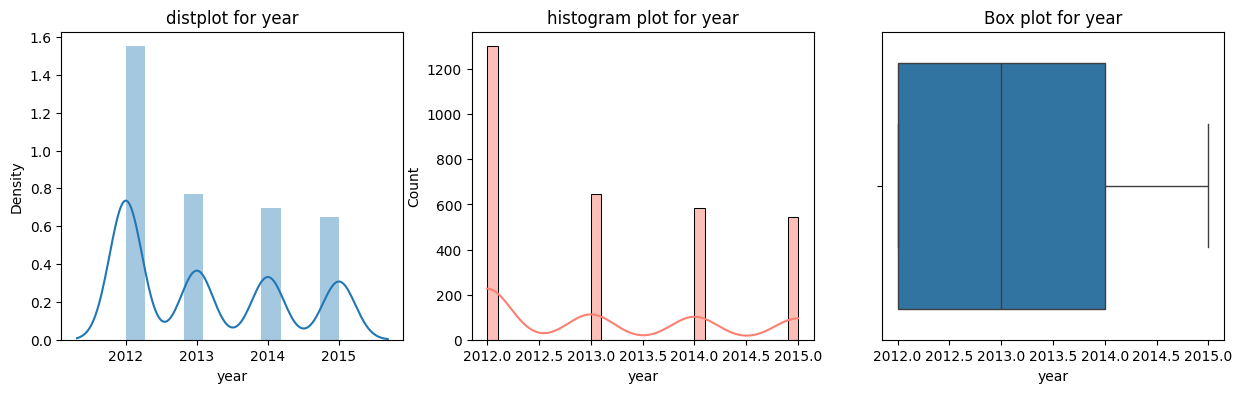

In [47]:
for i in columns:
  plot(df_samp,i)


In [48]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'day',
       'month', 'year'],
      dtype='object')

In [49]:
df_samp.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,3077.0,3.154049,6.240200,0.0,0.000000,0.00000,3.671393,55.9
temp_max,3077.0,14.241950,8.031935,-1.6,7.522773,13.30000,20.909972,35.0
temp_min,3077.0,6.382108,5.651048,-7.1,1.243550,6.10000,11.700000,18.3
wind,3077.0,3.193281,1.423194,0.4,2.124600,2.81102,4.151237,9.5
day,3077.0,15.803705,7.939413,1.0,9.000000,16.00000,22.000000,31.0
month,3077.0,5.927852,3.707529,1.0,2.000000,6.00000,9.000000,12.0
year,3077.0,2013.121222,1.142879,2012.0,2012.000000,2013.00000,2014.000000,2015.0
weather,3077.0,2.045824,1.413586,0.0,1.000000,2.00000,3.000000,4.0


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [51]:
#finding the best algorithm
def classification(df,algorithm):
  x=df.drop(columns=['weather'])
  y=df['weather']

  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

  model=algorithm().fit(x_train,y_train)
  y_pred=model.predict(x_test)

  y_pred_train=model.predict(x_train)

  y_pred_test=model.predict(x_test)

  #checking the accuracy score
  accuracy_train=accuracy_score(y_train,y_pred_train)
  accuracy_test=accuracy_score(y_test,y_pred_test)

  metrics={"algorithm":algorithm,
          "accuracy_train":accuracy_train,
          "accuracy_test":accuracy_test}

  return metrics



In [52]:
print(classification(df_samp,DecisionTreeClassifier))
print(classification(df_samp,RandomForestClassifier))
print(classification(df_samp,ExtraTreesClassifier))
print(classification(df_samp,AdaBoostClassifier))
print(classification(df_samp,GradientBoostingClassifier))
print(classification(df_samp,XGBClassifier))

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'accuracy_train': 1.0, 'accuracy_test': 0.8798701298701299}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'accuracy_train': 0.9995936611133686, 'accuracy_test': 0.935064935064935}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'accuracy_train': 1.0, 'accuracy_test': 0.9318181818181818}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'accuracy_train': 0.5091426249492076, 'accuracy_test': 0.5113636363636364}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>, 'accuracy_train': 0.9443315725314912, 'accuracy_test': 0.8831168831168831}
{'algorithm': <class 'xgboost.sklearn.XGBClassifier'>, 'accuracy_train': 1.0, 'accuracy_test': 0.9318181818181818}


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:

# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV
x=df_samp.drop(columns=['weather'])
y=df_samp['weather']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,4,5,10],
              "min_samples_split": [2,4,8,10],
              "min_samples_leaf": [2,4,8,10],
              "max_features": ['sqrt', 'log2', None],

           }

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 8, 10],
                         'min_samples_split': [2, 4, 8, 10]})

In [55]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [56]:
gridsearch.best_score_

0.873619287917017

In [57]:
gridsearch.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [58]:

x=df_samp.drop(columns=['weather'])
y=df_samp['weather']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(max_depth=10,max_features= 'sqrt',min_samples_leaf= 2,min_samples_split= 4)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9427062169849655
Accuracy_Test:  0.887987012987013
  
Confution_matrix for Test
--------------------------
[[106   3   0   4   3]
 [  1  80  25  11   0]
 [  0   9 105   2   0]
 [  0   2   9 122   0]
 [  0   0   0   0 134]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       116
           1       0.85      0.68      0.76       117
           2       0.76      0.91      0.82       116
           3       0.88      0.92      0.90       133
           4       0.98      1.00      0.99       134

    accuracy                           0.89       616
   macro avg       0.89      0.88      0.88       616
weighted avg       0.89      0.89      0.89       616



In [59]:
result=model.predict([[0,10.6,2.8,4.7,2,1,2019]])

In [60]:
result

array([2])

# **saving the model**

In [48]:
import pickle

In [49]:
with open('weather_model.pkl','wb') as f:
  pickle.dump(model,f)

In [50]:
with open('weather_model.pkl','rb') as f:
  model_w=pickle.load(f)

In [51]:
result=model_w.predict([[0,10.6,2.8,4.7,2,1,2019]])
result

array([2])

**streamlit part**

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [2]:
!pip install streamlit-option-menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 15.0 MB/s eta 0:00:00


In [3]:
!pip install streamlit-calendar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.7 MB/s eta 0:00:00


In [9]:
!pip install requests pandas


In [61]:
%%writefile weather_app_test.py
import streamlit as st
from streamlit_option_menu import option_menu
import pickle
import webbrowser
import requests
import pandas as pd



#function for predection

def predection(precipitation,temp_max,temp_min,wind,day,month,year):
  with open('weather_model.pkl','rb') as f:
    model=pickle.load(f)
  result=model.predict([[precipitation,temp_max,temp_min,wind,day,month,year]])
  if result==0:
    return 'rain'
  elif result==1:
    return 'sun'
  elif result==2:
    return 'fog'
  elif result==3:
    return 'drizzle'
  elif result==4:
    return 'snow'


#page layout

st.set_page_config(layout='wide')
st.image('/content/ocean-7461792_1280.jpg')
st.title('Weather Prediction')
tab1,tab2,tab3=st.tabs(['Home','Prediction','live'])
with tab1:
    st.header('Home')
    st.write('''
    ### Welcome to the Weather Prediction App!

    **Overview:**
    Our Weather Prediction App leverages advanced machine learning techniques to forecast weather conditions based on historical data. By entering parameters such as precipitation, maximum and minimum temperature, wind speed, and date, our model can accurately predict the likelihood of rain, sunshine, fog, drizzle, or snow.

    **How It Works:**
    - **Data Input:** Users can input key weather variables such as precipitation, temperature, and wind speed.
    - **Model Prediction:** The app uses a pre-trained machine learning model to analyze the input data and predict the weather for the selected date.
    - **Live Weather Map:** You can also explore current weather conditions globally through our integrated live weather map.

    **Features:**
    - **User-Friendly Interface:** A clean, intuitive design that makes it easy to input data and get predictions.
    - **Accurate Predictions:** Our model has been trained on a vast dataset to ensure accurate and reliable weather forecasts.
    - **Live Updates:** Access real-time satellite imagery and weather maps through our live weather tab.

    **Future Enhancements:**
    - Integration with more comprehensive weather data sources.
    - Enhanced predictive accuracy with ongoing model training and updates.
    - Additional weather parameters for even more precise forecasting.

    **Explore the App:**
    - Navigate to the 'Prediction' tab to enter your data and get weather forecasts.
    - Visit the 'Live' tab for real-time weather updates and satellite views.

    We hope you find this tool helpful and insightful. Enjoy exploring the weather like never before!

    **Developed by:** [Ajai Kumar]
    ''')


with tab2:
  st.header('Prediction')
  col1,col2=st.columns(2)
  with col1:

    precipitation=st.number_input('precipitation')
    temp_max=st.number_input('temp_max')
    temp_min=st.number_input('temp_min')
    wind=st.number_input('wind')

  with col2:
    # Create a date input widget
    selected_date = st.date_input("Select a date")
    day=selected_date.day
    month=selected_date.month
    year=selected_date.year
  if st.button('Predict',use_container_width=True):
    result=predection(precipitation,temp_max,temp_min,wind,day,month,year)
    st.success(result)



with tab3:
  st.header('live')

  if st.button("live map view"):
    st.write("Zoom Earth is a fantastic tool for exploring our planet and tracking weather patterns. It provides real-time satellite imagery, weather maps, and hurricane tracking, making it a valuable resource for meteorologists, researchers, and anyone interested in the environment.")
    st.markdown('[ZOOM EARTH](https://zoom.earth/places/india/#map=precipitation/model=icon)')


Overwriting weather_app_test.py


In [62]:
!wget -q -O - ipv4.icanhazip.com

34.125.192.141


In [ ]:
!streamlit run weather_app_test.py & npx localtunnel --port 8501